# Polynomial Regression

Anshu Kumar Agrawal <br/>
207108 CSE A

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math

In [252]:
def GenerateData(length, high, low, degree):
    uniformX = np.random.uniform(high=high,low=low,size=(length))
    params = 100*(np.random.rand(degree+1)-0.5)
    uniformY = np.zeros((length))
    for i in range(degree+1):
        uniformY += params[i]*(uniformX**i)
    noisyY = uniformY + 100*np.random.normal(size=(length))
    return uniformX, noisyY, params

In [249]:
class PolynomialRegression:
    def __init__(self,degree=1,reg=0,penalty=-18):
        self.reg = reg
        self.degree = degree+1
        self.lmd = math.e**penalty
        self.param = np.random.randint(low=0,high=5,size=(self.degree))
        
    def train(self,x, y, learning_rate=0.0000001, max_iter=10000):
        for it in range(max_iter):
            y_pred = self.predict(x)
            reg_term = self.regular_term()
            for it in range(max_iter):
                self.param = self.param - (np.array([(np.sum((y_pred-y)*(x**i))/len(x)+reg_term[i])*learning_rate for i in range(self.degree)]))
            return self.param    
          
    def regular_term(self):
        if self.reg == 0:    
            return np.zeros(self.degree)
        elif self.reg == 1:
            return np.full(self.degree, self.lmd)
        else :
            mag = math.sqrt(np.sum(self.param**2))
            return abs(self.param)*self.lmd/mag

    def predict(self,x):
        y = np.zeros(len(x))
        for i in range(self.degree):
            y += self.param[i]*(x**i)
        return y

[ -0.132949    -0.70102174 -53.45701415]
[-31.55318932   6.86331656 -40.86109856]


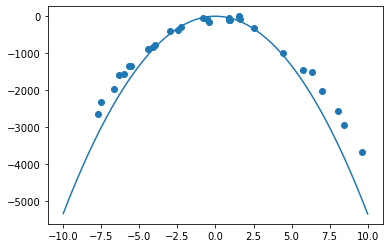

In [262]:
x, y, pp = GenerateData(30,10,-10,2)

pr = PolynomialRegression(degree=2)
xx = pr.train(x,y)

print(xx)
print(pp)
tmpx = np.linspace(-10,10,200)
plt.plot(tmpx, xx[0] + xx[1]*tmpx + xx[2]*(tmpx**2) )
plt.scatter(x,y)
plt.show()
